# HW 6: Neural Networks

## Question 1: Machine learning for object recognition

In this problem, we will process images coming from the CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes (i.e., airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) with 6000 images per class. There are 50000 training images and 10000 test images. More information about the data can be found here: https://www.cs.toronto.edu/~kriz/cifar.html.

The CIFAR-10 dataset is included in most of the frameworks for deep neural networks e.g., Keras, Tensorflow, PyTorch. In Keras, CIFAR-10 can be downloaded by running:

In [42]:
from keras.datasets import cifar10
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Note: The original CIFAR-10 with color images can take a long time to train. Hence, we will convert the color images into grayscale images. One way to achieve this would be to use a library such as scikit-image.

In [43]:
from skimage.color import rgb2gray
# convert to grayscale images
X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

## (a) Visualization
Randomly select and visualize 5-6 images (no need to include all the classes). 
Note: You can find a useful link on image pre-processing here: https://www.tensorflow.org/api_docs/python/tf/image/per_image_standardization 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

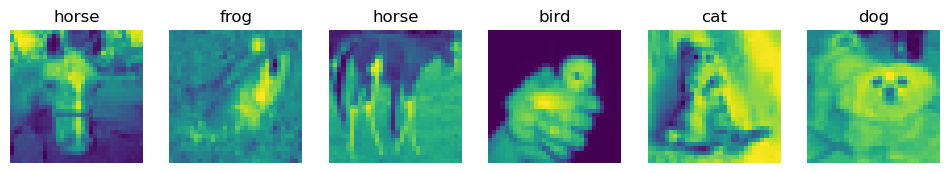

In [6]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the number of images to visualize
num_images = 6

# Select num_images random indices from the training set
random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)

# Create a figure with num_images subplots
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

# Loop over the selected indices and plot the corresponding images
for i, index in enumerate(random_indices):
    # Get the image and its label
    image = X_train[index]
    label = y_train[index][0]
    
    # Set the title to the class name
    title = class_names[label]
    
    # Plot the image
    axes[i].imshow(image)
    axes[i].set_title(title)
    axes[i].axis('off')
    
# Show the figure
plt.show()

## (b) Data exploration: 
Count the number of samples per class in the training data.

In [8]:
# Count the number of samples per class in the training set
num_samples = []
for i in range(len(class_names)):
    num_samples.append((y_train == i).sum())

# Print the results
for i in range(len(class_names)):
    print("Class {}: {} samples".format(class_names[i], num_samples[i]))

Class airplane: 5000 samples
Class automobile: 5000 samples
Class bird: 5000 samples
Class cat: 5000 samples
Class deer: 5000 samples
Class dog: 5000 samples
Class frog: 5000 samples
Class horse: 5000 samples
Class ship: 5000 samples
Class truck: 5000 samples


## (c) Image classification with FNNs 
In this part, you will use a feedforward neural network (FNN) (also called "multilayer perceptron") to perform the object classification task. The input of the FNN comprises of all the pixels of the image. Use one of the five batches of the training
data as a validation set.

In [44]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0 # convert the pixel values to float32 and normalize them to the range [0, 1].
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
num_validation_samples = 10000
X_val = X_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
X_train = X_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

In [24]:
# Define the FNN model

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2186 - accuracy: 0.1843 - val_loss: 2.1447 - val_accuracy: 0.2120
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.1170 - accuracy: 0.2322 - val_loss: 2.0896 - val_accuracy: 0.2388
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.0795 - accuracy: 0.2494 - val_loss: 2.0631 - val_accuracy: 0.2619
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.0597 - accuracy: 0.2627 - val_loss: 2.0474 - val_accuracy: 0.2717
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.0456 - accuracy: 0.2691 - val_loss: 2.0359 - val_accuracy: 0.2726
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.0330 - accuracy: 0.2783 - val_loss: 2.0239 - val_accuracy: 0.2742
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.0206 - accuracy: 0.2825 - val_loss: 2.0129 - val_accuracy:

## (c.i) 
Experiment on the validation set with different FNN hyper-parameters, e.g. # layers, # nodes per layer, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following: (1) monitor the loss on the train and validation set across the epochs of the FNN training; (2) report the final classification accuracy on the training and validation sets; (3) report the running time for training the FNN; (4) report the # parameters that are learned for each FNN. 
Note: If running the FNN takes a long time, you can subsample the training data (i.e., choose a random set of samples from training) or sub-sample the input images to a smaller size (e.g., 24 x 24).

1st combination: add a hidden layer containing 128 nodes. Both validation accuracy (0.3302) and test accuracy (0.3345) increase.

In [28]:
# Define the FNN model

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 4s 2ms/step - loss: 2.1613 - accuracy: 0.1941 - val_loss: 2.0768 - val_accuracy: 0.2415
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0590 - accuracy: 0.2493 - val_loss: 2.0494 - val_accuracy: 0.2575
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0315 - accuracy: 0.2632 - val_loss: 2.0120 - val_accuracy: 0.2771
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0076 - accuracy: 0.2780 - val_loss: 2.0124 - val_accuracy: 0.2662
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9849 - accuracy: 0.2896 - val_loss: 1.9664 - val_accuracy: 0.2975
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9586 - accuracy: 0.2993 - val_loss: 1.9425 - val_accuracy: 0.3092
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9316 - accuracy: 0.3097 - val_loss: 1.9258 - val_accuracy:

2nd combination: increase the nodes of the hidden layers. Both validation accuracy (0.3737) and test accuracy (0.3698) increase.

In [29]:
# Define the FNN model

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 2.1183 - accuracy: 0.2158 - val_loss: 2.0373 - val_accuracy: 0.2527
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0060 - accuracy: 0.2790 - val_loss: 1.9620 - val_accuracy: 0.2901
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9380 - accuracy: 0.3062 - val_loss: 1.9156 - val_accuracy: 0.3100
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8947 - accuracy: 0.3210 - val_loss: 1.8743 - val_accuracy: 0.3270
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8658 - accuracy: 0.3303 - val_loss: 1.8495 - val_accuracy: 0.3382
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8443 - accuracy: 0.3352 - val_loss: 1.8299 - val_accuracy: 0.3481
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8203 - accuracy: 0.3487 - val_loss: 1.8138 - val_accuracy

3rd combination: add a dropout rate of 0.5 in the hidden layers. Both validation accuracy (0.3358) and test accuracy (0.3366) decrease.

In [32]:
# Define the FNN model 

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 2.1833 - accuracy: 0.1817 - val_loss: 2.0725 - val_accuracy: 0.2401
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0736 - accuracy: 0.2434 - val_loss: 2.0264 - val_accuracy: 0.2704
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0338 - accuracy: 0.2639 - val_loss: 1.9737 - val_accuracy: 0.2912
Epoch 4/10
1250/1250 [==============================] - 9s 8ms/step - loss: 2.0050 - accuracy: 0.2760 - val_loss: 1.9493 - val_accuracy: 0.3031
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9815 - accuracy: 0.2883 - val_loss: 1.9243 - val_accuracy: 0.3122
Epoch 6/10
1250/1250 [==============================] - 9s 8ms/step - loss: 1.9660 - accuracy: 0.2925 - val_loss: 1.9034 - val_accuracy: 0.3218
Epoch 7/10
1250/1250 [==============================] - 9s 8ms/step - loss: 1.9483 - accuracy: 0.2977 - val_loss: 1.8850 - val_accuracy

## (c.ii) 
Run the best model that was found based on the validation set from question (c.i) on the testing set. Report the classification accuracy on the testing set. Report the confusion matrix for each class.
Note: The confusion matrix is a 10x10 matrix; its rows correspond to the actual labels for each class, while its columns correspond to the predicted classes. Element (i; j) includes the number of samples that belonged to the ith class and were predicted as the jth class. In a perfect classification task, the non-diagonal elements of the matrix will be all non-zero.

In [38]:
# Define the FNN model

model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n')
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 2.1269 - accuracy: 0.2110 - val_loss: 2.0451 - val_accuracy: 0.2658
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0288 - accuracy: 0.2674 - val_loss: 2.0114 - val_accuracy: 0.2715
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9816 - accuracy: 0.2874 - val_loss: 1.9496 - val_accuracy: 0.2969
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9297 - accuracy: 0.3077 - val_loss: 1.8969 - val_accuracy: 0.3210
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8895 - accuracy: 0.3216 - val_loss: 1.8690 - val_accuracy: 0.3311
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8660 - accuracy: 0.3306 - val_loss: 1.8538 - val_accuracy: 0.3401
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8470 - accuracy: 0.3374 - val_loss: 1.8393 - val_accuracy

In [36]:
# Generate the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion matrix:")
print(cm)

313/313 [==============================] - 1s 2ms/step
Confusion matrix:
[[423  34 110  18  89   7  68  38 188  25]
 [ 79 395  12  21  39  11  80  24 194 145]
 [133  23 302  41 159  35 176  56  61  14]
 [ 97  27 101 135 136 113 192  69  81  49]
 [144  25 147  17 364  19 140  64  63  17]
 [109  13 115  93 119 250 117  60  96  28]
 [102  40  84  30 119  40 482  28  49  26]
 [156  21  82  37 125  43  72 347  68  49]
 [162  64  25  12  44  22  29  27 568  47]
 [ 82 149  20  29  22  10  74  50 184 380]]


## (d) Image classification with CNNs 
In this part, you will use a convolutional neural network (CNN) to perform the object classification task.

In [47]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 
y_train = tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test) 

# Split the training data into training and validation sets
num_validation_samples = 10000 
x_val = x_train[:num_validation_samples] 
y_val = y_train[:num_validation_samples] 
x_train = x_train[num_validation_samples:] 
y_train = y_train[num_validation_samples:] 

## (d.i) 
Experiment on the validation set with different CNN hyper-parameters, e.g. # layers, filter size, stride size, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following: (1) monitor the loss on the train and validation set across the epochs of the CNN training; (2) report the final classification accuracy on the training and validation sets; (3) report the running time for training the CNN; (4) report the # parameters that are learned for each CNN. How do these metrics compare to the FNN?

1st combination: base model. Both validation accuracy (0.6851) and test accuracy (0.69) increase comparing to the FNN. 

In [49]:
# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val)) 

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) 
print('\n')
print("Test accuracy:", test_acc)

Epoch 1/10
1250/1250 [==============================] - 41s 31ms/step - loss: 1.5837 - accuracy: 0.4194 - val_loss: 1.3131 - val_accuracy: 0.5270
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.2169 - accuracy: 0.5670 - val_loss: 1.1708 - val_accuracy: 0.5913
Epoch 3/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.0643 - accuracy: 0.6252 - val_loss: 1.0270 - val_accuracy: 0.6386
Epoch 4/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.9612 - accuracy: 0.6607 - val_loss: 1.0080 - val_accuracy: 0.6526
Epoch 5/10
1250/1250 [==============================] - 41s 33ms/step - loss: 0.8816 - accuracy: 0.6891 - val_loss: 0.9259 - val_accuracy: 0.6752
Epoch 6/10
1250/1250 [==============================] - 42s 33ms/step - loss: 0.8174 - accuracy: 0.7116 - val_loss: 0.9537 - val_accuracy: 0.6655
Epoch 7/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.7642 - accuracy: 0.7319 - val_loss: 0.9198 -

2nd combination: increase the nodes of one convolutional layer and one fully connected layer. Both validation accuracy (0.7002) and test accuracy (0.7017) increase comparing to base model of CNN. 

In [48]:
# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

Epoch 1/10
1250/1250 [==============================] - 44s 33ms/step - loss: 1.5106 - accuracy: 0.4507 - val_loss: 1.3127 - val_accuracy: 0.5436
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1494 - accuracy: 0.5913 - val_loss: 1.0499 - val_accuracy: 0.6259
Epoch 3/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.9841 - accuracy: 0.6535 - val_loss: 1.0074 - val_accuracy: 0.6432
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.8759 - accuracy: 0.6930 - val_loss: 0.9108 - val_accuracy: 0.6802
Epoch 5/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.7868 - accuracy: 0.7257 - val_loss: 0.8775 - val_accuracy: 0.7021
Epoch 6/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.7088 - accuracy: 0.7505 - val_loss: 0.8633 - val_accuracy: 0.7026
Epoch 7/10
1250/1250 [==============================] - 43s 35ms/step - loss: 0.6436 - accuracy: 0.7733 - val_loss: 0.8519 -

3rd combination: use the LeakyReLU activation function instead of relu. Both validation accuracy (0.7644) and test accuracy (0.7620) increase comparing to model 2.

In [51]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# The alpha parameter controls the slope of the negative part of the activation function
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
           input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
           activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
           activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
           activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation=LeakyReLU(alpha=0.1), 
          kernel_regularizer=regularizers.l2(0.001)),
    Dense(units=10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

Epoch 1/10
1250/1250 [==============================] - 79s 61ms/step - loss: 1.4740 - accuracy: 0.5166 - val_loss: 1.1504 - val_accuracy: 0.6407
Epoch 2/10
1250/1250 [==============================] - 74s 59ms/step - loss: 1.0773 - accuracy: 0.6825 - val_loss: 1.0690 - val_accuracy: 0.6865
Epoch 3/10
1250/1250 [==============================] - 74s 59ms/step - loss: 0.9555 - accuracy: 0.7311 - val_loss: 1.0335 - val_accuracy: 0.7063
Epoch 4/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.8811 - accuracy: 0.7655 - val_loss: 0.9631 - val_accuracy: 0.7410
Epoch 5/10
1250/1250 [==============================] - 74s 59ms/step - loss: 0.8351 - accuracy: 0.7869 - val_loss: 0.9518 - val_accuracy: 0.7487
Epoch 6/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.7882 - accuracy: 0.8084 - val_loss: 0.9667 - val_accuracy: 0.7547
Epoch 7/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.7478 - accuracy: 0.8252 - val_loss: 0.9367 -

**Ans**: the training time of the CNN models (26-79secs) are all longer than FNN models (~10secs). The test and validation accuracy of all 3 CNN models are all higher than the FNN models. 

## (d.ii) 
Run the best model that was found based on the validation set from question (d.i) on the testing set. Report the classification accuracy on the testing set. How does this metric compare to the FNN?

**Ans**: The test accuracy of the best model with CNN (0.7620) is higher than that of the best model with FNN (0.3647). The time used to train the CNN model is also longer than that of the FNN model. Both the loss on the train (0.6647) and validation (1.0183) set for CNN model are lower than the loss on the train (1.8020) and validation (1.7928) set for the FNN model.

In [53]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 4s - loss: 1.0387 - accuracy: 0.7620 - 4s/epoch - 12ms/step
Test accuracy: 0.7620000243186951


In [52]:
# Generate the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion matrix:")
print(cm)

313/313 [==============================] - 4s 13ms/step
Confusion matrix:
[[804  20  50   8  10   2   4  17  59  26]
 [ 17 890   6   2   1   6   1   2  20  55]
 [ 62   4 702  22  69  52  43  24  15   7]
 [ 35  10  79 445  73 207  67  47  21  16]
 [ 15   4  79  38 731  33  29  56  14   1]
 [ 14   5  64  78  41 696  18  64  11   9]
 [  8   5  43  25  32  18 841  11  14   3]
 [ 15   1  41  17  44  44   6 819   6   7]
 [ 38  20  14   5   5   2   3   4 885  24]
 [ 29  91  10   3   4   2   4  26  24 807]]


## (e) Bayesian optimization for hyper-parameter tuning
Instead of performing grid or random search to tune the hyper-parameters of the CNN, we can also try a model-based method for finding the optimal hyper-parameters through Bayesian optimization. This method performs a more intelligent search on the hyperparameter space in order to estimate the best set of hyperparameters for the data. Use publicly available libraries (e.g.,
hyperopt in Python) to perform a Bayesian optimization on the hyperparameter space using the validation set. Report the emotion classification accuracy on the testing set.
Hint: Check this: https://github.com/hyperopt/hyperopt and this source: https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0.

CNN Model

In [59]:
from hyperopt import tpe, fmin, hp
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
import time

In [76]:
# Load the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [77]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)

# Preprocess the data
X_train = X_train.astype('float32') / 255.0 # convert the pixel values to float32 and normalize them to the range [0, 1].
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
num_validation_samples = 10000
X_val = X_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
X_train = X_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

In [80]:
# Load CIFAR-10 data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Preprocess the data
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)

# Define the search space
space = {'num_filters': hp.choice('num_filters', [32, 64, 128]),
         'kernel_size': hp.choice('kernel_size', [3, 5, 7]),
         'pool_size': hp.choice('pool_size', [2, 3]),
         'dropout': hp.uniform('dropout', 0, 0.5),
         'learning_rate': hp.loguniform('learning_rate', -5, -1)}

# Define the objective function
def objective(params):
    model = Sequential()
    model.add(Conv2D(params['num_filters'], (params['kernel_size'], params['kernel_size']), activation='relu', padding='same', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((params['pool_size'], params['pool_size'])))
    model.add(Dropout(params['dropout']))
    model.add(Conv2D(params['num_filters'], (params['kernel_size'], params['kernel_size']), activation='relu', padding='same'))
    model.add(MaxPooling2D((params['pool_size'], params['pool_size'])))
    model.add(Dropout(params['dropout']))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(lr=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_test, y_test))
    run_time = time.time() - start_time

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return {'loss': -accuracy, 'status': 'ok', 'params': params, 'run_time': run_time}

In [81]:
# Run the optimization
best = fmin(objective, space, algo = tpe.suggest, max_evals=10)

# Print the best hyperparameters
print(best)

100%|████████████████████████████████████████████| 10/10 [1:38:17<00:00, 589.76s/trial, best loss: -0.4596000015735626]
{'dropout': 0.15282827305034197, 'kernel_size': 1, 'learning_rate': 0.012384490053459417, 'num_filters': 2, 'pool_size': 1}


In [84]:
# Train the best model
model = Sequential()
model.add(Conv2D(best['num_filters'], (best['kernel_size'], best['kernel_size']), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((best['pool_size'], best['pool_size'])))
model.add(Dropout(best['dropout']))
model.add(Conv2D(best['num_filters'], (best['kernel_size'], best['kernel_size']), activation='relu', padding='same'))
model.add(MaxPooling2D((best['pool_size'], best['pool_size'])))
model.add(Dropout(best['dropout']))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(best['dropout']))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8912 - accuracy: 0.3117 - val_loss: 1.7438 - val_accuracy: 0.3829
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.7165 - accuracy: 0.3873 - val_loss: 1.6288 - val_accuracy: 0.4303
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6144 - accuracy: 0.4297 - val_loss: 1.5720 - val_accuracy: 0.4446
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5464 - accuracy: 0.4553 - val_loss: 1.5028 - val_accuracy: 0.4674
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.4984 - accuracy: 0.4701 - val_loss: 1.4747 - val_accuracy: 0.4786
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.4611 - accuracy: 0.4839 - val_loss: 1.4747 - val_accuracy: 0.4771
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4293 - accuracy: 0.4931 - val_loss: 1.4471 -

**Ans**: The test accuracy of the model with CNN is 0.4895. The time used to train the CNN model is about 17 secs per epoch. The loss on the train and validation set is 1.3436 and 1.4659 respectively. 